## Figures

* Alibaba foreknowledge vs requested social welfare with a range of results data ranges
* Synthetic greedy with a range of settings
* Synthetic greedy resource ratio
* Synthetic auction with a range of settings
* Synthetic DIA heuristic grid search
* Synthetic DIA mutation ???
* Synthetic online batch sizes

## Model sizes
* 10 Tasks, 2 Servers (Elastic, Non elastic and Greedy)
* 15 Tasks, 3 Servers (Elastic, Non elastic and Greedy)
* 25 Tasks, 5 Servers (Non elastic and Greedy)
* 50 Tasks, 10 Servers (Greedy)
* 75 Tasks, 15 Servers (Greedy)

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
def collect_results(filename, col, algos):
    with open(filename) as file:
        results = json.load(file)
        return [[model_results[algo][col] for model_results in results if algo in model_results] 
                for algo in algos]

In [3]:
greedy_algo = 'Greedy Utility * deadline / Sum, Sum, Percent Sum'

In [4]:
def greedy_performance(folder, filenames, model_sizes, algos, algo_names, col='social welfare percent'):
    fig, axs = plt.subplots(1, len(filenames), figsize=(12, 3))
    for ax, filename, model_size in zip(axs, filenames, model_sizes):
        print(f'{folder}/{filename}')
        model_size_result = collect_results(f'{folder}/{filename}', col, algos)
        ax.boxplot(model_size_result, vert=False, widths=0.9)
        ax.set_xlabel('Social Welfare Percentage')
        ax.set_yticklabels([''] * len(algos))
        ax.set_title(model_size)

    axs[0].set_yticklabels(algo_names)
    fig.tight_layout()
    return fig, axs

In [5]:
def greedy_resource_usage(folder, filenames, algos, algo_names):
    fig, axs = plt.subplots(len(filenames), 3, figsize=(14, 3*len(filenames)))
    for pos, filename in enumerate(filenames):
        print(filename)
        with open(f'{folder}/{filename}') as file:
            data = json.load(file)

        algo_resource_usage = {algo: {'storage': [], 'compute': [], 'bandwidth': []} for algo in algos}
        for result in data:
            for algo in algos:
                if algo in result:
                    algo_resource_usage[algo]['storage'] += list(result[algo]['server storage usage'].values())
                    algo_resource_usage[algo]['compute'] += list(result[algo]['server compute usage'].values())
                    algo_resource_usage[algo]['bandwidth'] += list(result[algo]['server bandwidth usage'].values())

        for ax, (algo, resource_usage), name in zip(axs[pos], algo_resource_usage.items(), algo_names):
            ax.set_title(name)
            for resource, usage in resource_usage.items():
                ax.hist(usage, label=resource)
            ax.legend()
    
    plt.tight_layout()
    return fig, axs

## Alibaba foreknowledge vs requested social welfare with a range of results data ranges

In [6]:
model_sizes = ['10 Tasks, 2 Servers', '15 Tasks, 3 Servers', '20 Tasks, 4 Servers']
algo_names = ['Non-elastic\nOptimal', 'Greedy\nAlgorithm', 'Elastic\nOptimal']

### Foreknowledge

../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt05-09_13-01-41.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt05-09_13-01-41.json
../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt05-09_13-01-41.json
Save file location: figs/eps/alibaba_foreknowledge.eps
Save file location: figs/png/alibaba_foreknowledge.png
Save file location: figs/pdf/alibaba_foreknowledge.pdf


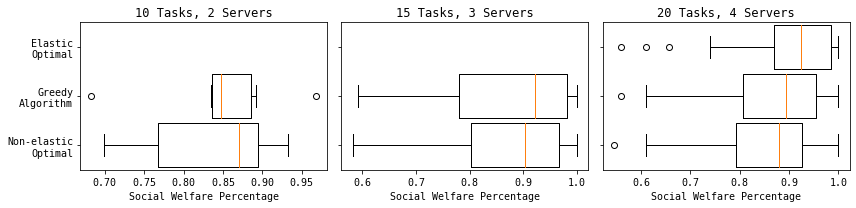

In [7]:
algos = ['foreknowledge fixed optimal', f'foreknowledge {greedy_algo}', 'foreknowledge flexible optimal']
greedy_performance('../data/alibaba', os.listdir('../data/alibaba'), model_sizes, algos, algo_names)
save_plot('alibaba_foreknowledge')

foreknowledge_alibaba_r_t20_s4_dt05-09_13-01-41.json
foreknowledge_alibaba_r_t15_s3_dt05-09_13-01-41.json
foreknowledge_alibaba_r_t10_s2_dt05-09_13-01-41.json


(<Figure size 1008x648 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>],
        [<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>],
        [<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>]], dtype=object))

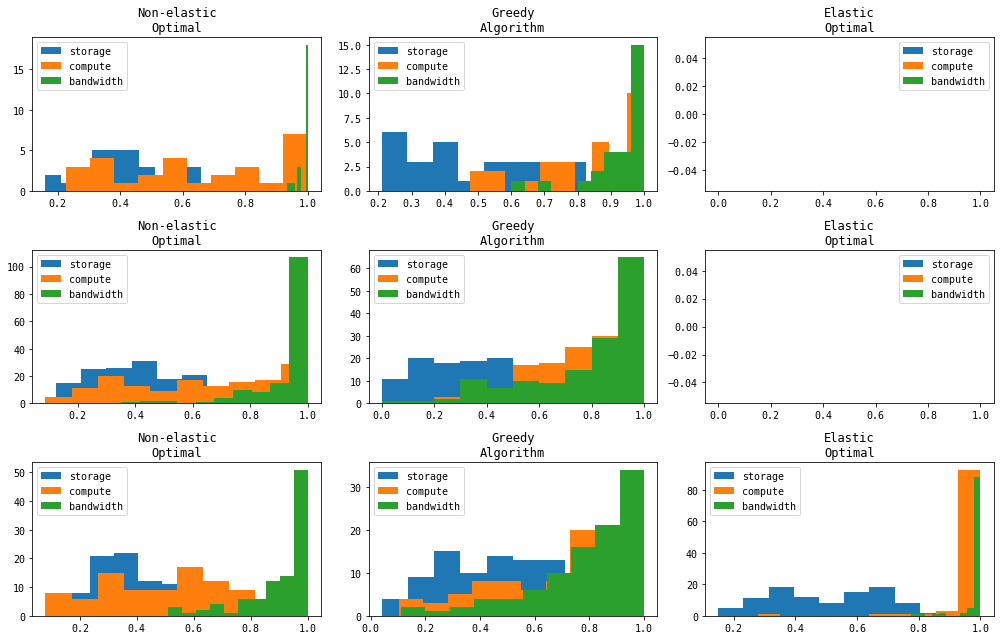

In [8]:
_ = greedy_resource_usage('../data/alibaba', os.listdir('../data/alibaba'), algos, algo_names)

### Requested

../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt05-09_13-01-41.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt05-09_13-01-41.json
../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt05-09_13-01-41.json
Save file location: figs/eps/alibaba_requested.eps
Save file location: figs/png/alibaba_requested.png
Save file location: figs/pdf/alibaba_requested.pdf


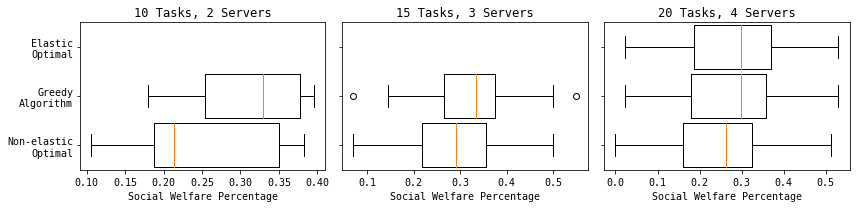

In [9]:
algos = ['requested fixed optimal', f'requested {greedy_algo}', 'requested flexible optimal']
greedy_performance('../data/alibaba', os.listdir('../data/alibaba'), model_sizes, algos, algo_names)
save_plot('alibaba_requested')

foreknowledge_alibaba_r_t20_s4_dt05-09_13-01-41.json
foreknowledge_alibaba_r_t15_s3_dt05-09_13-01-41.json
foreknowledge_alibaba_r_t10_s2_dt05-09_13-01-41.json


(<Figure size 1008x648 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>],
        [<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>],
        [<AxesSubplot:title={'center':'Non-elastic\nOptimal'}>,
         <AxesSubplot:title={'center':'Greedy\nAlgorithm'}>,
         <AxesSubplot:title={'center':'Elastic\nOptimal'}>]], dtype=object))

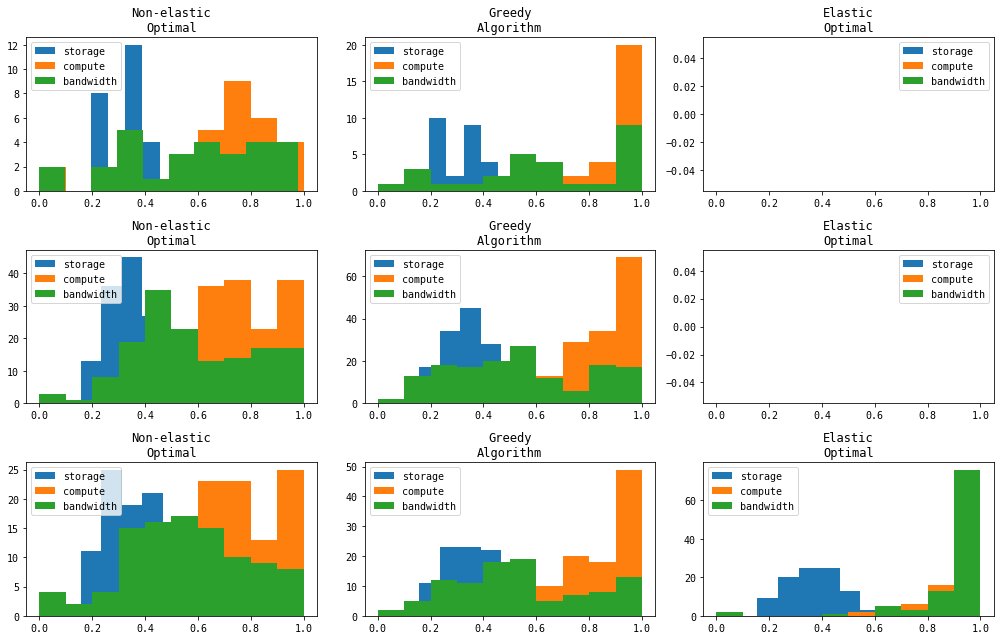

In [10]:
_ = greedy_resource_usage('../data/alibaba', os.listdir('../data/alibaba'), algos, algo_names)

## Synthetic greedy with a range of settings

In [ ]:
os.listdir('../data/greedy/')

In [ ]:
greedy_filenames = ['', '', '', '']
model_sizes = ['' ,'', '', '']
algos = ['Server Relaxed Flexible Optimal', 'Flexible Optimal', greedy_algo, 'Fixed Optimal']

fig, axs = plt.subplots(1, 4, figsize=(12, 3.5))
for ax, filename, name in zip(axs, greedy_filenames, file_type):
    results = collect_results(f'greedy/{filename}', 'social welfare percent', algos)
    ax.boxplot(results, vert=False, widths=0.9)
    ax.set_xlabel('Social welfare percentage')
    ax.set_yticklabels(['', '', '', ''])
    ax.set_title(name)
    
axs[0].set_yticklabels(['Non-elastic\nOptimal', 'Greedy\nAlgorithm', 'Elastic\nOptimal', 
                        'Server\nRelaxed\nElastic\nOptimal'])
fig.tight_layout()
save_plot('greedy_social_welfare')

## Synthetic greedy resource ratio

In [ ]:
os.listdir('../data/resource_ratio')

In [ ]:
algorithms = [('Greedy Algorithm', greedy_algo), ('Fixed Resource Allocation', 'Fixed Optimal')]

with open('../data/resource_ratio/') as file:
    ratio_data = json.load(file)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for ax, resource in zip(axs, ['server storage used', 'server computation used', 'server bandwidth used']):
    for name, algo in algorithms:
        ratio_results = []
        ax.errorbars(ratios, np.mean(ratio_results, axis=1), 
                     yerr=1.96 * np.std(social_welfares, axis=1) / np.sqrt(len(results_data)), label=name)
        
    ax.set_xticklabels([])
    ax.set_xticks(ratios)
    ax.set_xlabel('Ratio of Computation:Bandwidth')
    ax.set_ylabel('Resource Usage (%)')

plt.legend()
save_plot('resource_ratio_server_usage')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
for name, algo in algorithms:
    social_welfares = [[result[f'ratio {ratio}'][algo]['social welfare'] for result in results_data] for ratio in ratios]
    error = 1.96 * np.std(social_welfares, axis=1) / np.sqrt(len(results_data))
    ax.errorbar(x=ratios, y=np.mean(social_welfares, axis=1), yerr=error, label=name)

ax.set_ylabel('Social Welfare', fontsize=12)
ax.set_yticks(fontsize=11)
ax.set_xlabel('Ratio of Computation:Bandwidth', fontsize=12)
ax.set_xticks(ticks=ratios, labels=ratio_labels, fontsize=11)

plt.legend(fontsize=12)
save_plot('resource_ratio_social_welfare')

## Synthetic auction with a range of settings

In [ ]:
auction_filenames = []
file_type = []
algos = ['', '', '', '']

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 3.5))
for ax, filename, name in zip(axs, auction_filenames, file_type):
    results = collect_results(f'../data/auction/{filename}', 'social welfare percent', algos)
    ax.boxplot(results, vert=False, widths=0.9)
    ax.set_xlabel('Social welfare percentage')
    ax.set_yticklabels(['', '', '', ''])
    ax.set_title(name)
    
axs[0].set_yticklabels(['', '', '', ''])
fig.tight_layout()
save_plot('auction_social_welfare')

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 3.5))
for ax, filename, name in zip(axs, auction_filenames, file_type):
    results = collect_results(f'../data/auction/{filename}', 'revenue', algos)
    ax.boxplot(results, vert=False, widths=0.9)
    ax.set_xlabel('Social welfare percentage')
    ax.set_yticklabels(['', '', '', ''])
    ax.set_title(name)
    
axs[0].set_yticklabels(['', '', '', ''])
fig.tight_layout()
save_plot('auction_revenue')

## Synthetic DIA heuristic grid search

In [ ]:
with open('../data/dia_heuristics/dia_heuristic_grid_search_paper_r_t30_s6_dt07-22_12-17-27.json') as file:
    results_data = json.load(file)
    
heuristic_results = {}
for model_results in results_data:
    for heuristic, heuristic_result in model_results.items():
        if heuristic == 'model':
            continue
        elif heuristic in heuristic_results:
            heuristic_results[heuristic].append(heuristic_result)
        else:
            heuristic_results[heuristic] = [heuristic_result]

In [ ]:
heuristic_avg_results = []
for heuristic, results in heuristic_results.items():
    heuristic_avg_results.append([
        heuristic, results[0]['price change'], results[0]['initial price'],
        [r['social welfare'] for r in results],
        [r['social welfare percent'] for r in results],
        [r['percentage tasks allocated'] for r in results],
        [r['total revenue'] for r in results],
        [r['rounds'] for r in results],
        [r['solve time'] for r in results],
        [task_price for r in results for task_price in r['task prices'].values()],
        np.mean([r['social welfare'] for r in results]),
        np.mean([r['total revenue'] for r in results]),
        np.mean([r['rounds'] for r in results]),
        np.mean([task_rounds for r in results for task_rounds in r['task rounds'].values()])
    ])
    
heuristic_df = pd.DataFrame(heuristic_avg_results, columns=[
    'name', 'price change', 'initial price', 'social welfare', 'social welfare percent', 
    'percentage tasks allocated', 'revenue', 'rounds', 'solve time', 'task prices', 
    'avg social welfare', 'avg revenue', 'avg rounds', 'avg task rounds',
])
heuristic_df = heuristic_df.sort_values(by=['price change', 'initial price'])

In [ ]:
def difference(results_1, results_2):
    sw, rev, rounds, solve_time, task_rounds = [], [], [], [], []
    for r1, r2 in zip(results_1, results_2):
        sw.append(r1['social welfare'] / r2['social welfare'])
        rev.append(r1['total revenue'] / r2['total revenue'])
        rounds.append(r1['rounds'] / r2['rounds'])
        solve_time.append(r1['solve time'] / r2['solve time'])
    return np.mean(sw), np.mean(rev), np.mean(rounds), np.mean(solve_time), sw, rev, rounds, solve_time

min_heuristic_results = heuristic_results['IP: 20, PC: 1']
heuristic_difference_results = [
    [heuristic, results[0]['price change'], results[0]['initial price'], *difference(results, min_heuristic_results)]
    for heuristic, results in heuristic_results.items()
]
heuristic_diff_df = pd.DataFrame(heuristic_difference_results, columns=[
    'name', 'price change', 'initial price', 
    'social welfare diff', 'revenue diff', 'rounds diff', 'solve time diff',
    'social welfare diff list', 'revenue diff list', 'rounds diff list', 'solve time diff list'
])

In [ ]:
def heuristic_heatmap(ax, col, df, label_df, label_col, title='', print_heatmap=True,
                      initial_prices=['40', '35', '30', '25', '20'], price_changes=['1', '3', '5', '7', '10']):
    ax.set_yticks(np.arange(len(price_changes)))
    ax.set_yticklabels(list(reversed(price_changes)), fontsize=11)
    ax.set_ylabel('Bid Increment', fontsize=13)
    
    ax.set_xticks(np.arange(len(initial_prices)))
    ax.set_xticklabels(list(reversed(initial_prices)), fontsize=11)
    ax.set_xlabel('Reserve Price', fontsize=13)
    
    heatmap = ax.imshow(df.pivot(index='price change', columns='initial price', values=col).sort_index(axis=0, ascending=False))
    colour_bar = plt.colorbar(heatmap, shrink=0.82, ax=ax)
    ax.set_title(title)
    
    for x, initial_price in enumerate(initial_prices):
        for y, price_change in enumerate(price_changes):
            label = label_df[label_df['name'] == f'IP: {initial_price}, PC: {price_change}'].get(label_col).values[0]
            ax.text(len(initial_prices) - 1 - x, len(price_changes) - 1 - y, 
                    round(label), color='white', ha='center', va='center', weight='bold', fontsize=12)
            
    if print_heatmap:
        print(f'\n\t{col}')
        print(df.pivot(index='price change', columns='initial price', 
                       values=col).sort_index(axis=0, ascending=False))
        print(f'\n\t{label_col}')
        print(label_df.pivot(index='price change', columns='initial price', 
                             values=label_col).sort_index(axis=0, ascending=False))
        print()

In [ ]:
fig, (ax_social_welfare, ax_revenue, ax_rounds) = plt.subplots(1, 3, figsize=(15, 4.5))

heuristic_heatmap(ax_social_welfare, 'social welfare diff', heuristic_diff_df, heuristic_df, 'avg social welfare', 'Social Welfare')
heuristic_heatmap(ax_revenue, 'revenue diff', heuristic_diff_df, heuristic_df, 'avg revenue', 'Revenue')
heuristic_heatmap(ax_rounds, 'rounds diff', heuristic_diff_df, heuristic_df, 'avg rounds', 'Rounds')

plt.tight_layout()
save_plot('dia_heuristic_grid_search')

## Synthetic DIA mutation ???

## Synthetic online batch sizes

In [ ]:
batch_sizes = []

fig, ax = plt.subplots(figsize=(14, 3))


plt.tight_layout()
save_plot('online_batch_sizes')